In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud
from PIL import Image

## Importando Dados do CSV

In [33]:
data = pd.read_csv('lei_rouanet_final.csv')
data['dia'] = pd.to_datetime(data['dia'])
data.describe()

,com,ret,likes
count,16465.000000,16465.000000,16465.000000
mean,0.857212,4.444276,20.710234
std,12.871254,75.492130,368.121091
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,642.000000,4500.000000,24400.000000


##### pelo 75% dos tweets tem 0 curtidas, retweets e comentarios

### Coletando uma amostra de 8000 elementos

In [34]:
amostra_data = data.sample(8000)

In [35]:
amostra_data.describe()

,com,ret,likes
count,8000.000000,8000.000000,8000.000000
mean,0.937125,4.187625,19.592875
std,14.114038,62.003373,304.717236
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,542.000000,2200.000000,11500.000000


### Salvando os tweets da amostra e de todo o data set em variaveis

In [36]:
tweets = data["tweet"]
tweets_amostra = amostra_data["tweet"]

### Mostrando o histograma da coluna de Likes

In [37]:
k = math.ceil(1 + 3.3 * math.log10(len(amostra_data)))

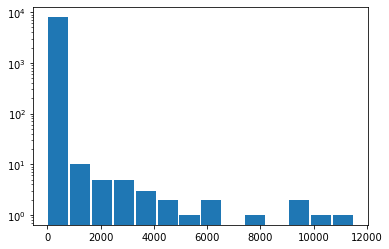

In [40]:
plt.hist(amostra_data['likes'], bins=k, log = True, rwidth = 0.92)
plt.show()

### Mostrando o histograma da coluna de retweets

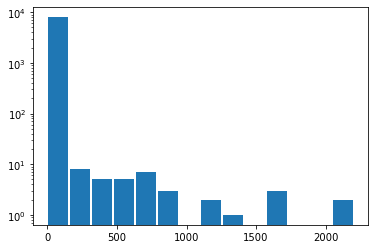

In [41]:
plt.hist(amostra_data['ret'], bins=k, log = True, rwidth = 0.92)
plt.show()

### Mostrando o histograma da coluna de Comentarios

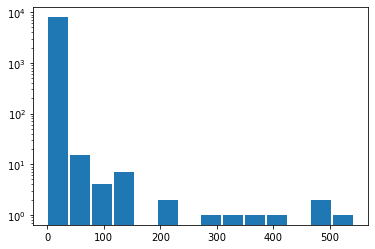

In [42]:
plt.hist(amostra_data['com'], bins=k, log = True, rwidth = 0.92)
plt.show()

### Calculando correlação entre esses atributos

In [43]:
correlacao = amostra_data.corr(method= "spearman", min_periods = 1)
correlacao

,com,ret,likes
com,1.000000,0.567668,0.570917
ret,0.567668,1.000000,0.703355
likes,0.570917,0.703355,1.000000


Pelos valores de indice de correlação, observamos que os atributos likes e retweets tem uma forte correlação positiva
os outros atributos também apresentam uma correlação positiva mas não tão forte quanto a de cima

### Plotando o grafico de correlação

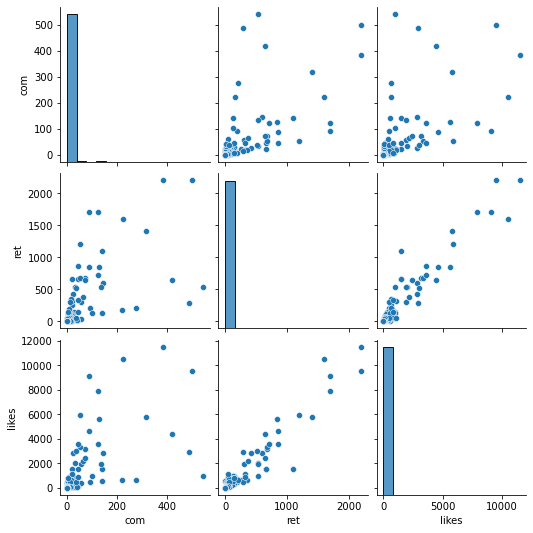

In [44]:
import seaborn as sns
sns.pairplot(amostra_data)

Observando o grafico podemos observar melhor a correlação entre os atributos

#### Lista de palavras com pouca relevancia

In [45]:
STOPWORDS = ['?','faz','.','assim','à','eles','até','via','pelo','-','ela','ta','era',
             'quem','eu','tá','foi','pela','ser',',','tem','só','sem','vai',
             'é','e','ne','né','isso','onde','estão','esta','está','ver','pq','essa','vez','nas',
             'mas','qual','porque','ele','ter','pois','este','vez','q',
             'para','já','aos','pode','outro',
             'pra','desse','alguns','meio','entre','das',
             'podem','esse','seu','também','são','quando','de', 
             'que','em','os','as','da','como','dos','ou','se','um',
             'uma','para','na','ao','mais','por','não','ainda','muito','sua','a','vc','voce','o','a','você','ai','aí','vocês','vcs'] + list(STOPWORDS)

Nesse lista esta contido palavras como conectivos, artigos, preposições. São palavras que naturalmente irão aparecer bastante
em textos por isso é importante ignorar nesse contexto.

In [46]:
#Juntando todos os tweets em uma unica String
textos = ""
for tweet in tweets_amostra:
    textos += tweet + " "

## Gerando Nuvem de Palavras contidas nos textos da amostra

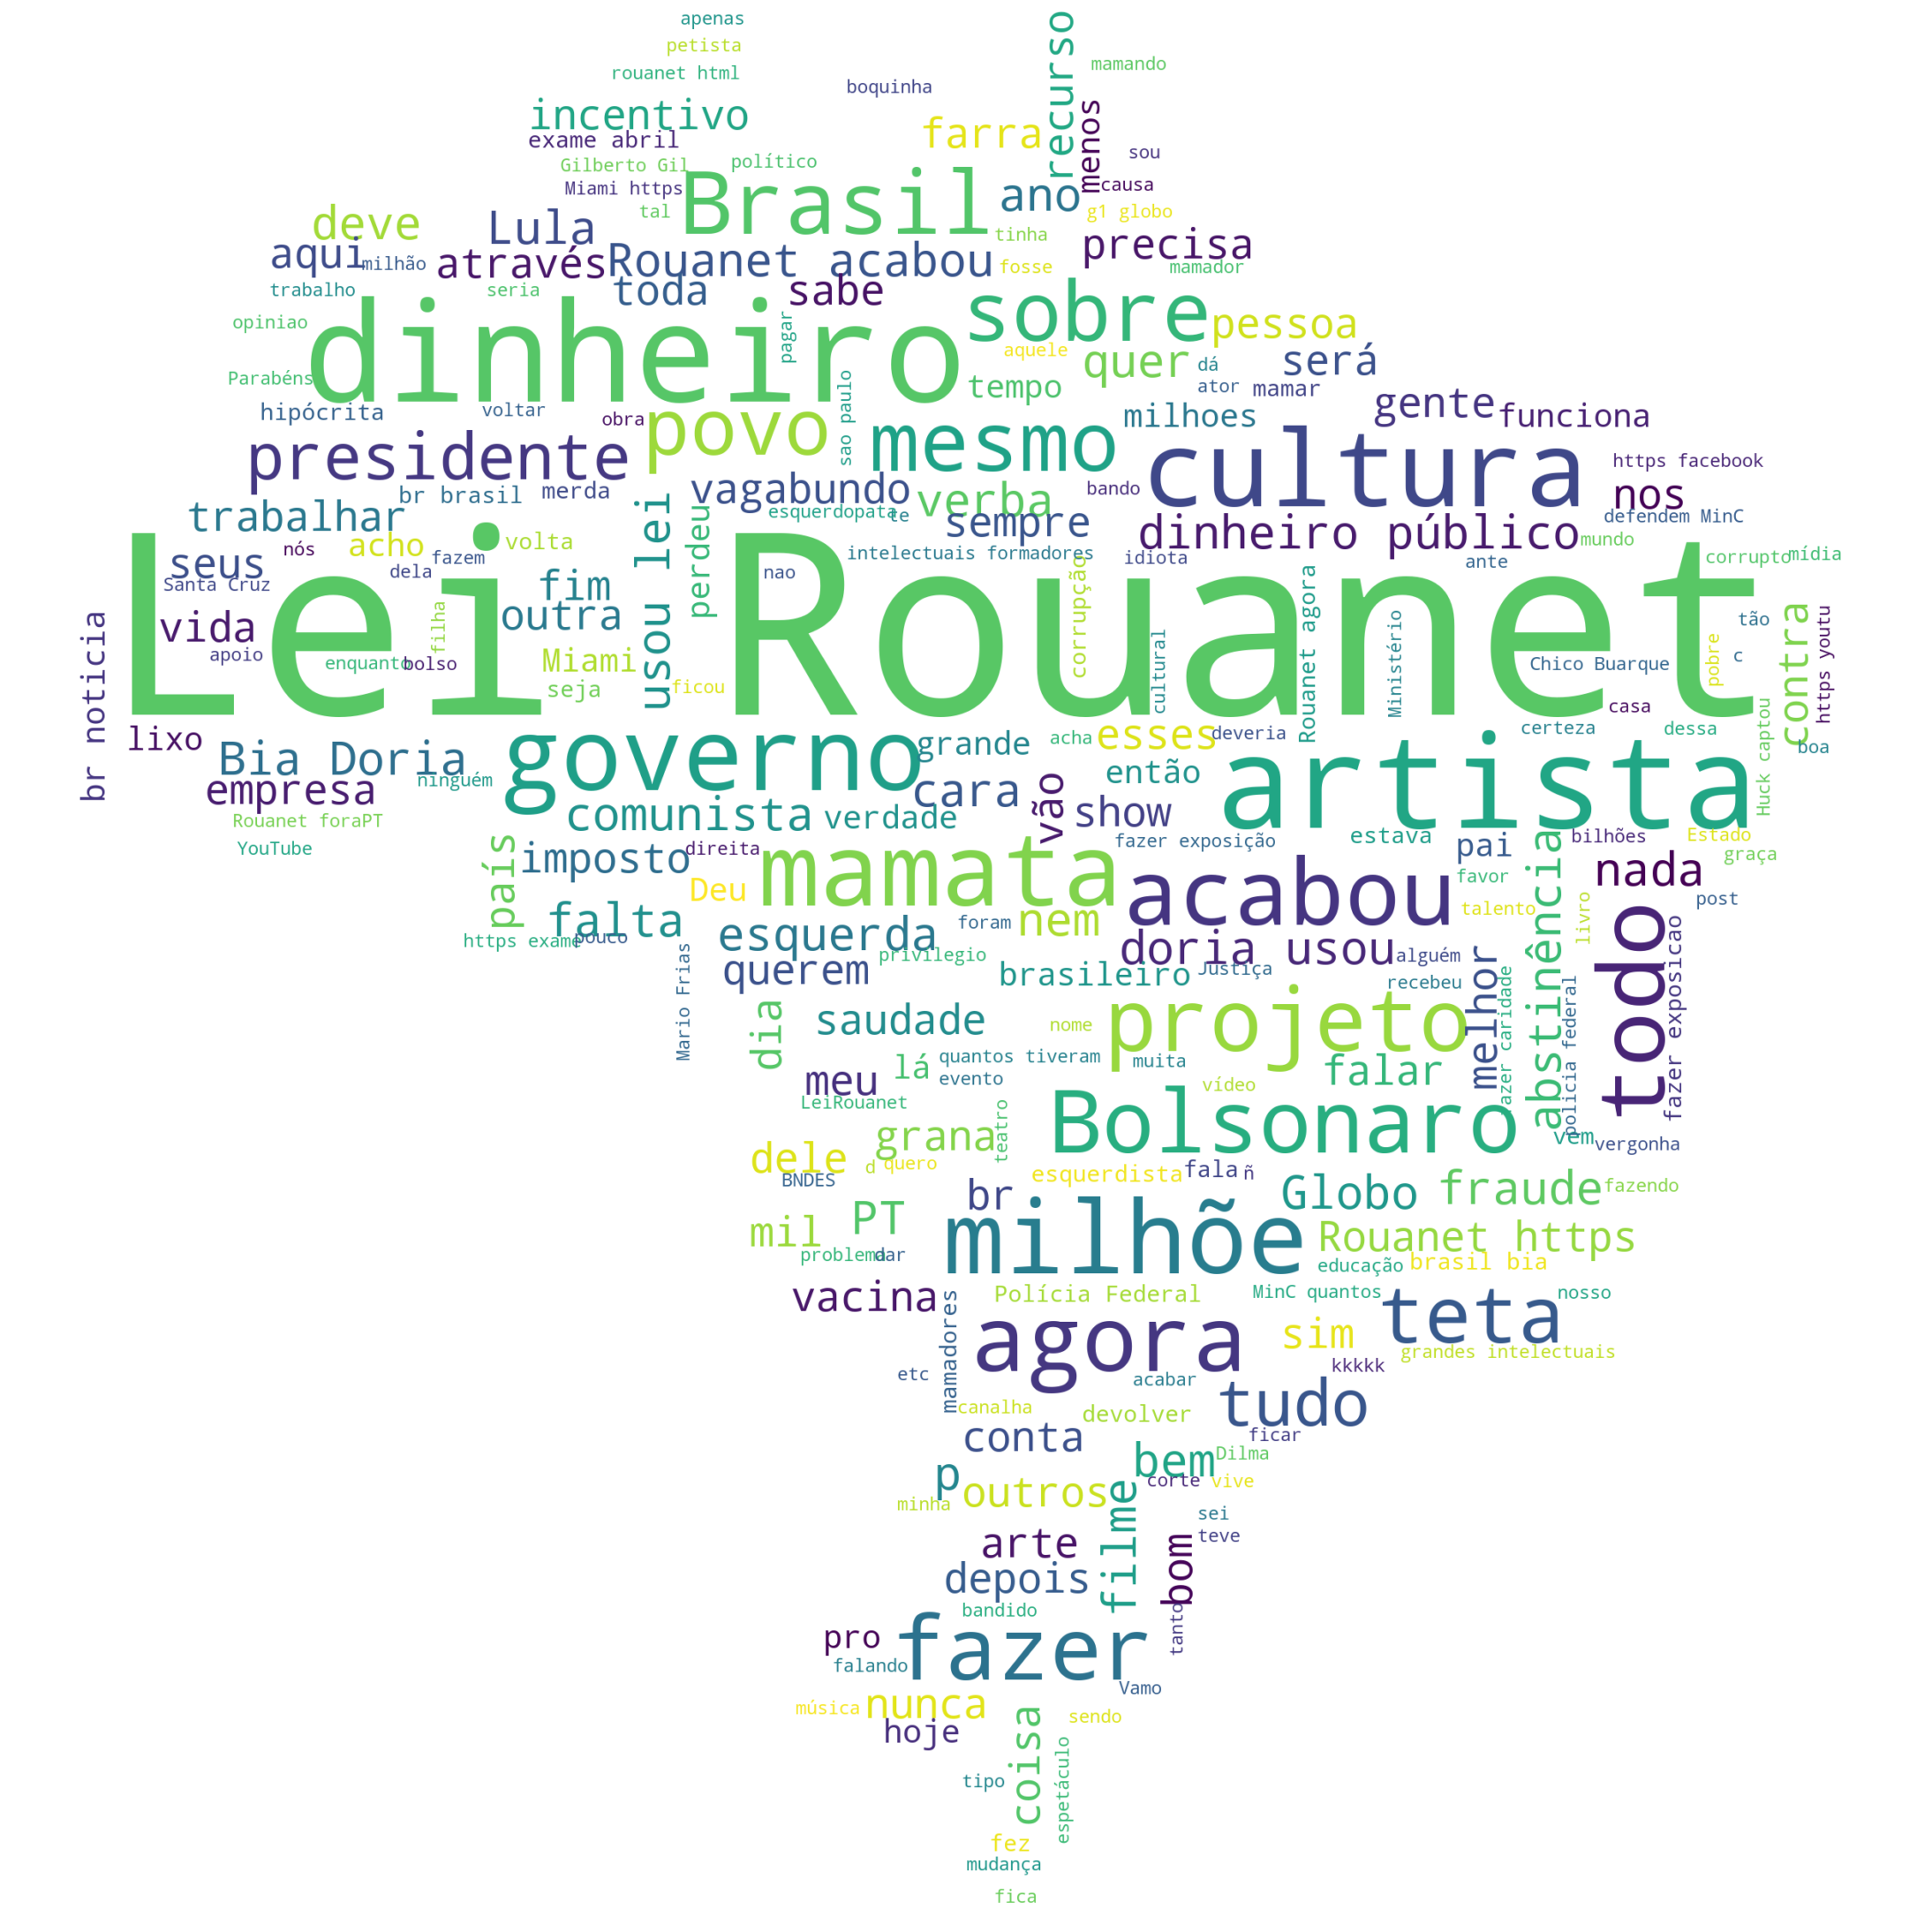

In [47]:
mask = np.array(Image.open('brasil.jpg')) 
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],scale=6)
wc.generate(textos)
plt.figure( figsize=(80,40) ) #ajustar tamanho imagem
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('nuvem_lei.jpg')

### Contando a ocorrencia de cada palavra (usando todos os dados)

In [48]:
def count_words(tweets, STOPWORDS):
    words = dict()

    for tweet in tweets:
        tweet_words = tweet.split()
        for word in tweet_words:
            word = word.lower()
            if word not in STOPWORDS:
                if 'rouanet' in word:
                    words['rouanet'] = words.get('rouanet', 0) + 1
                else:
                     words[word] = words.get(word, 0) + 1
                        
    palavras = pd.DataFrame({"word":list(words), "count":list(words.values())})
    palavras = palavras.sort_values(by=['count'], ascending=False, ignore_index=True)
    
    return palavras

In [49]:
palavras = count_words(tweets, STOPWORDS)
palavras

,word,count
0,rouanet,17667
1,lei,16633
2,dinheiro,2506
3,artistas,1143
4,acabou,934
...,...,...
40170,onibus,1
40171,sujo.,1
40172,pergunto...chachito,1
40173,#neymarexcapitao,1


In [50]:
palavras.describe()

,count
count,40175.000000
mean,5.784692
std,123.718645
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17667.000000


Com o valor teto do terceiro quartil sendo igual a 2 observamos que 75% tem no maximo duas ocorrencias, 
levando em conta todos os tweets. O que nos diz que poucas palavras aparecem com uma frequencia consideravel

### Observando o BoxPlot e o Histograma fica mais claro ainda 

<AxesSubplot:>

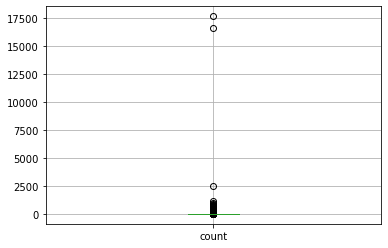

In [51]:
palavras.boxplot()

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

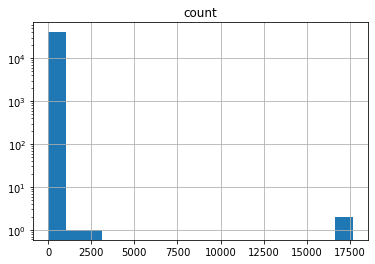

In [52]:
k_pal = math.ceil(1 + 3.3 * math.log10(len(palavras)))
palavras.hist(bins = k_pal, log=True)

## DataFrame com as top 15 palavras mais comuns 
### (sem contar "Lei" e "Rouanet")

In [53]:
top_15 = palavras.head(17).drop([0,1])

In [54]:
top_15

,word,count
2,dinheiro,2506
3,artistas,1143
4,acabou,934
5,milhões,904
6,fazer,811
7,governo,800
8,mamata,749
9,agora,745
10,r$,689
11,sobre,678


### Grafico para melhor vizualização

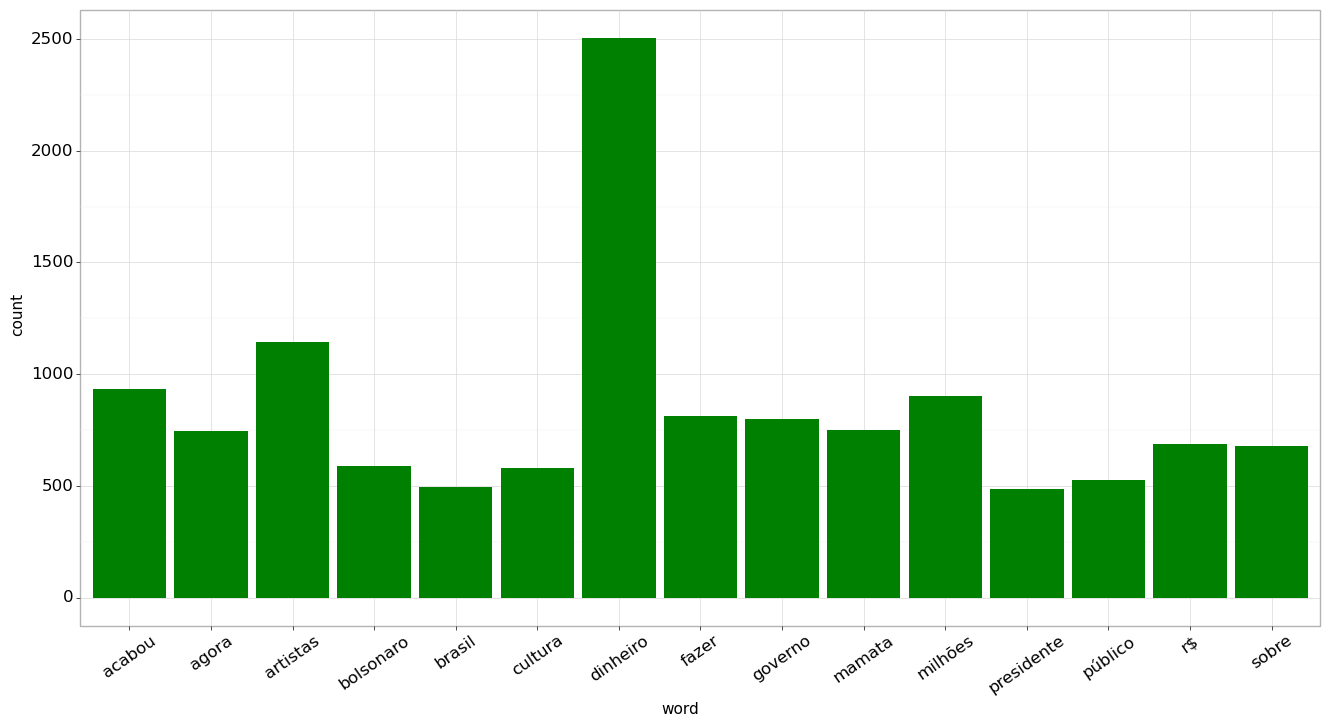

<ggplot: (93028300788)>

In [55]:
from plotnine import *

(ggplot(top_15,aes('word', 'count'))
  + geom_col(fill='green')
  + theme_light()
  + theme(figure_size=(16, 8), axis_text_x = element_text(weight = '400',color='black',size=12,angle=35), axis_text_y = element_text(weight = '400',color='black',size=12))
)

## Achando correlação entre as palavras

In [25]:
def corr_entre_palavras(colunas, tweets):
    corr_palavras = pd.DataFrame(columns=colunas)
    
    for tweet in tweets:
        linha = dict()
        tweet = tweet.lower()
        for atributo in colunas:
            if atributo in tweet:
                linha[atributo] = 1
            else:
                linha[atributo] = 0 
        corr_palavras = corr_palavras.append(linha, ignore_index=True)
        
    corr_palavras = corr_palavras.astype(float)
    
    a = corr_palavras.corr(method= "spearman", min_periods = 1)
    
    return a

In [56]:
colunas = top_15['word'].values
corr_df = corr_entre_palavras(colunas, tweets)

In [57]:
corr_df 

,dinheiro,artistas,acabou,milhões,fazer,governo,mamata,agora,r$,sobre,bolsonaro,cultura,público,brasil,presidente
dinheiro,1.000000,0.052243,-0.001034,-0.000816,0.047667,0.010307,-0.010795,0.014142,-0.012356,-0.029858,0.022279,-0.026394,0.317126,0.003821,0.005198
artistas,0.052243,1.000000,0.011529,0.026390,-0.004463,0.079788,0.007254,0.018131,-0.033143,-0.000678,0.044295,-0.002793,0.061185,0.041473,0.023345
acabou,-0.001034,0.011529,1.000000,-0.011876,-0.006666,-0.004648,0.426410,0.083474,-0.031615,-0.041962,0.046773,-0.046620,-0.011556,0.005957,0.033404
milhões,-0.000816,0.026390,-0.011876,1.000000,0.048790,0.050203,-0.024201,-0.013449,0.521184,-0.032336,0.039283,-0.022374,0.063890,0.032286,-0.012733
fazer,0.047667,-0.004463,-0.006666,0.048790,1.000000,0.008054,-0.009705,0.010204,0.056895,-0.014974,-0.004224,-0.019948,0.067926,0.136040,0.004550
governo,0.010307,0.079788,-0.004648,0.050203,0.008054,1.000000,0.013395,0.021238,0.056392,0.000587,0.103996,0.084286,-0.003187,0.025663,0.008434
mamata,-0.010795,0.007254,0.426410,-0.024201,-0.009705,0.013395,1.000000,0.053910,-0.027560,-0.026894,0.033067,-0.039305,0.006143,-0.004670,0.024992
agora,0.014142,0.018131,0.083474,-0.013449,0.010204,0.021238,0.053910,1.000000,-0.027375,-0.009234,0.038896,-0.019580,-0.006349,0.036147,0.031135
r$,-0.012356,-0.033143,-0.031615,0.521184,0.056895,0.056392,-0.027560,-0.027375,1.000000,-0.026635,-0.010406,0.009458,0.080043,-0.002575,0.044650
sobre,-0.029858,-0.000678,-0.041962,-0.032336,-0.014974,0.000587,-0.026894,-0.009234,-0.026635,1.000000,0.006828,0.088998,-0.011836,0.000325,0.008885


### Selecionando correlações positivas e maiores ou iguais a 0.1

In [58]:
def select_relevant(corr_df, colunas):
    corr_relevantes = []
    for linha in corr_df.itertuples():
        counter = 0
        for corr in linha[1:]:
            if corr >= 0.10 and linha[0] != colunas[counter]:
                if [colunas[counter],linha[0],corr] not in corr_relevantes:
                    corr_relevantes.append([linha[0],colunas[counter],corr])
            counter += 1
    
    atributos = []
    indices = []
    for corr in corr_relevantes:
        atributos.append("[" + corr[0] + ' , ' +corr[1]+"]")
        indices.append(corr[2])

    corr_dict = {"atributos":atributos, "indices":indices}
    
    corr_data_frame = pd.DataFrame(corr_dict)
    
    return corr_data_frame

In [59]:
corr_data_frame = select_relevant(corr_df, colunas)

In [60]:
corr_data_frame

,atributos,indices
0,"[dinheiro , público]",0.317126
1,"[acabou , mamata]",0.426410
2,"[milhões , r$]",0.521184
3,"[fazer , brasil]",0.136040
4,"[governo , bolsonaro]",0.103996
5,"[bolsonaro , presidente]",0.218388


### Grafico para melhor visualização

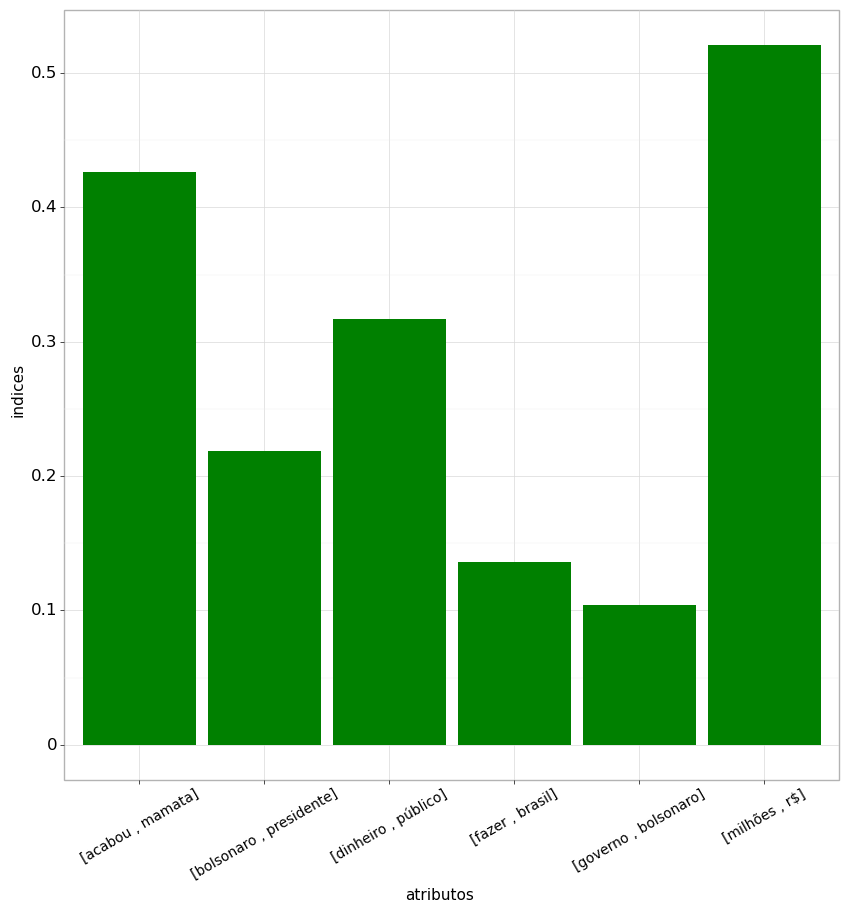

<ggplot: (93027898859)>

In [61]:
def plotar_corr(data_frame, text_size = 10, fig_size = (10,10)):

    return (ggplot(data_frame,aes('atributos', 'indices'))
      + geom_col(fill='green')
      + theme_light()
      + theme(figure_size=fig_size , axis_text_x = element_text(weight = '400',color='black',size=text_size,angle=30), axis_text_y = element_text(weight = '400',color='black',size=12))
    )
    
plotar_corr(corr_data_frame)